**Лекция 5**

# Линейная регрессия

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обозначения" data-toc-modified-id="Обозначения-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обозначения</a></span></li><li><span><a href="#Генерация-данных" data-toc-modified-id="Генерация-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Генерация данных</a></span></li><li><span><a href="#Метод-наименьших-квадратов" data-toc-modified-id="Метод-наименьших-квадратов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Метод наименьших квадратов</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Линейная регрессия</a></span><ul class="toc-item"><li><span><a href="#Формулировка-задачи" data-toc-modified-id="Формулировка-задачи-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Формулировка задачи</a></span></li><li><span><a href="#Решение" data-toc-modified-id="Решение-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Решение</a></span></li><li><span><a href="#Пример.-Полиномиальная-регрессия" data-toc-modified-id="Пример.-Полиномиальная-регрессия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Пример. Полиномиальная регрессия</a></span></li></ul></li><li><span><a href="#Алгоритмы-решения-задачи-МНК" data-toc-modified-id="Алгоритмы-решения-задачи-МНК-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Алгоритмы решения задачи МНК</a></span><ul class="toc-item"><li><span><a href="#Разложение-Холецкого" data-toc-modified-id="Разложение-Холецкого-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Разложение Холецкого</a></span></li><li><span><a href="#QR-разложение" data-toc-modified-id="QR-разложение-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>QR-разложение</a></span></li></ul></li><li><span><a href="#Источники" data-toc-modified-id="Источники-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Источники</a></span></li></ul></div>

In [1]:
# Imports
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import scipy

In [2]:
# Styles
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap
figsize = (8, 5)

import seaborn
seaborn.set_style('whitegrid')

In [3]:
import warnings
warnings.filterwarnings('ignore')

# %config InlineBackend.figure_formats = ['pdf']
%config Completer.use_jedi = False

---

## Обозначения

Задачу обучения по прецедентам при $Y = \mathbb{R}$ принято называть задачей *восстановления регрессии*. Введём основные обозначения.

Задано пространство объектов $X$ и множество ответов $Y$. Мы предполагаем существование зависимости $y^*:X \rightarrow Y$, значения которой известны только на объектах обучающей выборки $X^m = (x_i, y_i)_{i=1}^m$.

Требуется построить алгоритм (&laquo;*функцию регрессии*&raquo;) $a: X \rightarrow Y$, аппроксимирующий целевую зависимость $y^*$.

- $X$ &mdash; объекты; $Y$ &mdash; ответы;
- $X^m = (x_i, y_i)_{i=1}^m$ &mdash; обучающая выборка;
- $y_i = y^*(x_i), y^*:X \rightarrow Y$ &mdash; неизвестная зависимость.

Общее количество *объектов* $m$, для их индексации используется буква $i$. \
Общее количество *признаков* $n$, для их индексации используется буква $j$. \
Матрица объекты&ndash;признаки имеет размерность $m \times n$:
$$
  \mathbf{F} = 
  \begin{pmatrix}
    f_1(x_1) & \ldots & f_n(x_1) \\
    \vdots   & \ddots & \vdots   \\
    f_1(x_m) & \ldots & f_n(x_m) \\
  \end{pmatrix}
$$.

---

## Генерация данных

В качестве обучающих данных будем использовать зашумлённую линейную зависимость между $y$ и $x$.
Для выборки данных размером $m$ предполагаемая зависимость может быть смоделирована следующим образом:

$$ y_i = \theta_0 + \theta_1 x_i + \epsilon_i  \quad (i = 1, \ldots, m). $$

Здесь:
- $x_i$ &mdash; независимая (входная) переменная выборки $i$, с $x = \{x_i \ldots x_m \}$;
- $y_i$ &mdash; зависимая (выходная) переменная выборки $i$, с $y = \{y_i \ldots y_m \}$;
- $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$ &mdash; нормальный шум, влияющий на выходной сигнал $y_i$;
- $\theta = \{\theta_0, \theta_1 \}$ &mdash; набор параметров: смещение $\theta_0$ и наклон $\theta_1$.

In [4]:
# Define the data
np.random.seed(42)
# Generate random data
n = 20 # Number of samples
# Underlying linear relation
m = 3  # slope
b = 2  # bias
# Noise
e_std = 0.5  # Standard deviation of the noise
err = e_std * np.random.randn(n)  # Noise
# Features and output
X_train = np.random.uniform(0, 1, n)  # Independent variable x
Y_train = X_train * m + b + err  # Dependent variable

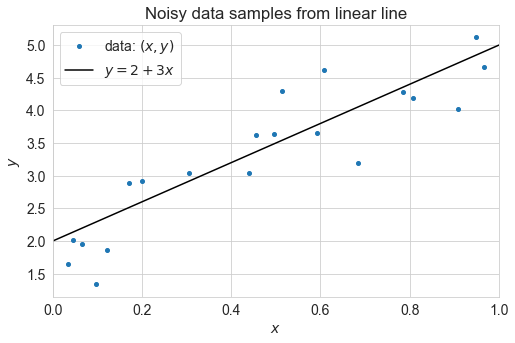

In [5]:
# Show the data
plt.figure(figsize=figsize)
plt.plot(X_train, Y_train, 'o', ms=4, label='data: $(x,y)$')
plt.plot([0, 1], [b, m+b], 'k-', label=f'$y = {b:.0f} + {m:.0f}x$')
plt.xlim((0, 1))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Noisy data samples from linear line')
plt.legend(loc='upper left')
plt.show()

---

## Метод наименьших квадратов

Пусть задана *модель регрессии* &mdash; параметрическое семейство функций $g(x,\alpha)$, где $\alpha \in \mathbb{R}^p$ &mdash; вектор параметров модели. 

Определим функционал качества аппроксимации целевой зависимости на выборке $X^m$ как сумму квадратов ошибок:
$$ Q(\alpha, X^m) = \sum_{i=1}^m \left( g(x_i, \alpha) - y_i \right)^2. $$

Обучение по *методу наименьших квадратов* (МНК) состоит в том, чтобы найти вектор параметров $\alpha^*$, при котором достигается минимум среднего квадрата ошибки на заданной обучающей выборке $X^m$:

$$ \alpha^* = \underset{\alpha \in \mathbb{R}^p}{\mathrm{argmin}} \, {Q(\alpha, X^m)}. $$

Стандартный способ решения этой оптимизационной задачи &mdash; воспользоваться необходимым условием минимума.
Если функция $g(x, \alpha)$ достаточное число раз дифференцируема по $\alpha$, то в точке минимума выполняется система $p$ уравнений относительно $p$ неизвестных:

$$ \frac{\delta}{\delta \alpha} Q(\alpha, X^m) = 2 \sum_{i=1}^{m} \left( g(x_i, \alpha) -y_i \right) \frac{\delta}{\delta \alpha} g(x_i, \alpha) = 0. $$

---

## Линейная регрессия

### Формулировка задачи

>Линейная регрессия является одной из самых простых моделей машинного обучения. Есть мнение, что её даже не следует классифицировать как &laquo;машинное обучение&raquo;, потому что она слишком простая.
>Тем не менее, простота делает её прекрасной отправной точкой для понимания более сложных методов.

Пусть каждому объекту соответствует его признаковое описание $\left( f_1(x), \ldots, f_n(x)\right)$, где $f_j: X \rightarrow \mathbb{R}$ &mdash; числовые признаки, $j = 1, \ldots , n$.
Линейной моделью регрессии называется линейная комбинация признаков с коэффициентами $\alpha \in \mathbb{R}^n$:
$$ g(x, \alpha) = \sum_{j=1}^n \alpha_j f_j(x). $$

Введём матричные обозначения: $F = \left( f_j(x_i) \right)_{m \times n}$ &mdash; матрица объекты–признаки;
$y = \left( y_i \right)_{m \times 1}$ &mdash; целевой вектор;
$\alpha = \left( \alpha_i \right)_{n \times 1}$ &mdash; вектор параметров.

Применим метод наименьших квадратов к нашей линейной модели.

В матричных обозначениях функционал качества $Q$ принимает вид
$$ Q(\alpha) = \left\Vert F\alpha - y \right\Vert^2. $$

Тогда задача поиска параметров регрессии может быть сформулирована так: 
$$ \alpha^* = \underset{\alpha \in \mathbb{R}^n}{\text{argmin}} \, {\left\Vert F\alpha - y \right\Vert^2}. $$

### Решение

Запишем функционал качества в матричном виде:
$$ Q(\alpha) = (F\alpha - y)^\top (F\alpha - y) $$

и выпишем необходимое условие минимума:
$$ \frac{\delta Q(\alpha)}{\delta \alpha} = 2F^\top (F\alpha - y) = 0. $$

Отсюда следует $F^{\top} F \alpha = F^{\top}y$.
Эта система линейных уравнений относительно $\alpha$ называется *нормальной системой* для задачи наименьших квадратов.

Если матрица $F^{\top} F$ невырождена (для этого столбцы матрицы $F$ должны быть линейно независимы), то решением нормальной системы является вектор

$$ \alpha^* = (F^{\top} F)^{-1} F^{\top} y = F^{+} y. $$

Матрица $F^{+} = (F^{\top} F)^{-1} F^{\top}$ является *псевдообратной* для прямоугольной матрицы $F$.

Подставляя найденное решение в исходный функционал, получаем

$$ Q(\alpha^*) = \left\Vert P_Fy - y \right\Vert^2, $$

где $P_F = FF^{+} = F(F^{\top}F)^{-1}F^{\top}$ &mdash; проекционная матрица.

Решение имеет простую геометрическую интерпретацию.
Произведение $P_Fy$ есть проекция целевого вектора $y$ на линейную оболочку столбцов матрицы $F$.
Разность $(P_Fy-y)$ есть проекция целевого вектора $y$ на ортогональное дополнение этой
линейной оболочки.
Значение функционала $Q(\alpha^*) = \left\Vert P_Fy - y \right\Vert^2$ есть квадрат длины перпендикуляра, опущенного из $y$ на линейную оболочку.
Таким образом, МНК находит кратчайшее расстояние от $y$ до линейной оболочки столбцов F.

### Пример. Полиномиальная регрессия

Рассмотрим частный случай линейной регрессии &mdash; полиномиальную регрессию.

Тогда линейная модель
$$ g(x, \alpha) = \sum_{j=0}^{n-1} \alpha_j p_j(x).$$

Здесь $p(x) = \{1, x, \ldots, x^{n-1}\}$ &mdash; набор базисных полиномов, $\alpha = \{\alpha_0, \ldots, \alpha_{n-1}\}$ &mdash; набор искомых параметров.

Матрица объекты&ndash;признаки в этом случае выглядит так:
$$
  \mathbf{F} = 
  \begin{pmatrix}
    1      & x_1    & \ldots & x_1^{n-1} \\
    \vdots & \vdots & \ddots & \vdots    \\
    1      & x_m    & \ldots & x_m^{n-1} \\
  \end{pmatrix}.
$$

Пример построения полиномиальной регрессии для наших данных приведён ниже.

In [6]:
# The number of features
Nf = 2

# Make objects-features matrix: stack ones and X
F = np.ones_like(X_train)
for i in range(1, Nf):
    F = np.vstack((F, X_train**i))
F = F.T

# Find optimal hyperparameters
Alpha = LA.solve(F.T @ F, F.T @ Y_train)
display(Alpha)

# Function representing fitted line
f = lambda x: sum([Alpha[i]*x**i for i in range(Nf)])

array([1.86789431, 3.10047182])

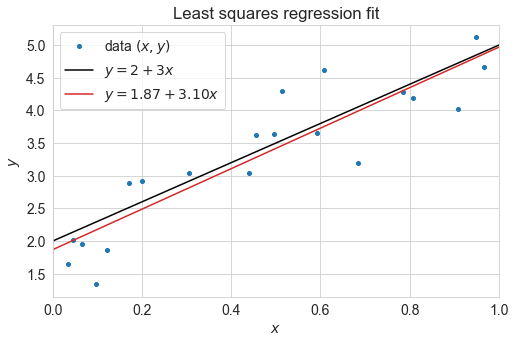

In [7]:
# Show fitted line
X_disp = np.linspace(0, 1, 100)
OLS_label = f'$y = {Alpha[0]:.2f} + {Alpha[1]:.2f} x$' \
if (Nf==2) else 'OLS'

plt.figure(figsize=figsize)
plt.plot(X_train, Y_train, 'o', ms=4, label='data $(x,y)$')
plt.plot([0, 1], [b, m+b], 'k-', label=f'$y = {b:.0f} + {m:.0f}x$')
plt.plot(X_disp, f(X_disp), '-', c=cm(3), label=OLS_label)
plt.title('Least squares regression fit')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim((0, 1))
plt.legend(loc='upper left')
plt.show()

## Алгоритмы решения задачи МНК

Рассмотрим задачу МНК с точки зрения вычислительной математики.

### Разложение Холецкого

Матрица $F$ должна быть полного ранга. \
Так как матрица $F^\top F$ симметрическая и положительно определённая, её можно разложить по Холецкому.
Дальше нужно последовательно решить две системы линейных уравнений с треугольными матрицами.

In [8]:
# 0. Set up the problem
FtF = F.T @ F
Fty = F.T @ Y_train

# 1. Compute Cholesky factorization of FtF
L = LA.cholesky(FtF)

# 2. Solve the lower triangular system Lt*w = Ft*y for w
L_inv = LA.inv(L)
w = L_inv @ Fty
# w = scipy.linalg.solve_triangular(L, Fty)

# 3. Solve the upper triangular system L*x = w for x
x_chol = L_inv.T @ w
np.disp(x_chol)

[1.86789431 3.10047182]


Алгоритм требует $O(mn^2 + \frac{1}{3}n^3)$ операций. \
Решение нормальной системы уравнений, возможно, будет неустойчивым, поэтому метод рекомендуется только для небольших задач. \
В целом метод *не рекомендуется*.

### QR-разложение

Матрица $F$ должна быть полного ранга. \
Здесь применяется обобщение $QR$-разложения (reduced QR factorization), в котором матрица $Q$ размеров $m \times n$ составлена из $n$ ортонормированных столбцов, а $R$ &mdash; квадратная верхняя треугольная матрица порядка $n$ ($qR$-разложение).

In [9]:
# 0. Set up the problem
# Already done

# 1. Compute reduced QR factorization of F
q, R = LA.qr(F)

# 2. Solve the upper triangular system R*x = Qt*y for x
x_qr = LA.solve(R, q.T @ Y_train)
np.disp(x_qr)

[1.86789431 3.10047182]


Алгоритм требует $O(2mn^2 - \frac{2}{3}n^3)$ операций. \
По сравнению с алгоритмом Холецкого $QR$-алгоритм более устойчив и может рассматриваться как *стандартный метод* решения задачи МНК.

---

## Источники

1. *Воронцов К.В.* [Математические методы обучения по прецедентам (теория обучения машин)](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf). &mdash; 141 c.
1. [Материалы](http://www.math.iit.edu/~fass/477577_Chapter_5.pdf) автора [G. Fasshauer](http://www.math.iit.edu/~fass/).

In [10]:
# Versions used
import sys
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('scipy: {}'.format(scipy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))

Python: 3.9.7
numpy: 1.20.3
scipy: 1.7.1
matplotlib: 3.4.3
seaborn: 0.11.2
